# Projections in Linear Algebra

By Alex Murphy [September 2021]

Linear algebra is a toolkit that contains many different components that are useful for the DIY-world of data science and machine learning. Some tools in the toolkit are useful in and of themselves, such as complete algorithms that help to make sense of data such as Principal Components Analysis (PCA) or matrix factorisation methods such as SVD / QR / LU / Cholesky Decompositions (blog post links added shortly). If you pick out a complex mechanical tool out of a real toolkit, break it open and look at the inner workings, you can often isolate key features that are shared by many other tools. This is analogous to projections in linear algebra – a simple idea whose extended application forms the basis of many more intricate, technical and fascinating algorithms that are in the data scientist’s toolkit.

## Presumed Knowledge

To fully understand this article, the only real assumed knowledge is a general understanding of points, lines, dimensionality of points and vectors and a working knowledge of what the **dot product** operation is. You are welcome to read on to get a sense of projections in linear algebra without this knowledge, but some of the maths will likely not be very clear.

### Give me some examples!
* Linear Regression uses the notion of projection to cast noisy data onto the best linear subspace, which minimises the overall squared distance between the regression line and these (noisy) points
* Orthogonal matrices are a very desirable property in data analysis and machine learning, which allow for efficient solutions to otherwise-intractable problems, such as matrix inversion via transposition. Getting orthogonal matrices is thus a key step in the process and this depends entirely upon algorithms that project data onto different subspaces

## Preliminary Glossary

It will be useful to explain a few terms here with simple definitions that you can conceptualise in advance, so that these can be held in mind when the rest of the post refers to those terms.

* **Ambient Space** – the space that points / vectors exist within, i.e. a vector with 4 values lives in 4D ambient space, though the elements in the space might only span a 2D subspace within 4D ambient space
* **Basis Vector** – a vector which provides the direction that defines a particular subspace
* **Norm** – the norm of a vector is the length of that vector, found by treating its distance from the origin as the hypotenuse of a right-triangle using Pythagoras’s Theorem. The squared norm is just the dot product of the vector with itself. Taking the square root leads to the standard norm
* **Scalar** – a single number which multiplies a vector, thereby ‘scaling’ it by the magnitude of the value (i.e. multiplying by 2 will double the length of a vector)
* **Subspace** – subspaces have a very precise definition in linear algebra, but conceptually it’s enough to consider a one-dimensional line in 2D space, or a 2D plane in 3D space. If you remove a dimension then you are restricted. Consider walking around a room in 2D space and then you meet a staircase. You can only walk forwards / backwards in the line defined by the direction of the staircase (no left-right movement)

## A Conceptual Introduction
The concept of linear projection has a nice real-world analogue in something most of us will be familiar with from childhood, namely shadow puppets.

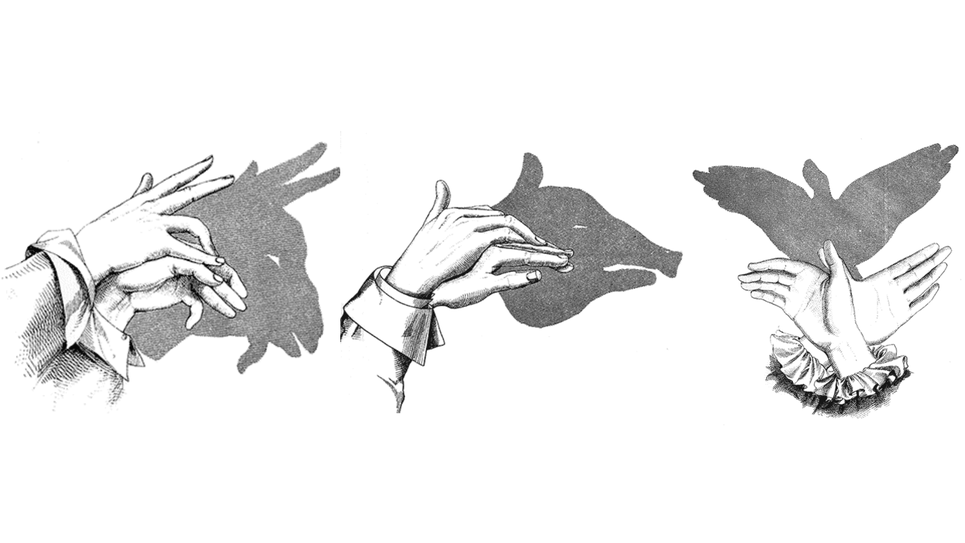

In [6]:
from IPython import display
display.Image("Projections/shadow_puppets.png")

“What is the connection?” you might ask. Shadow puppets exist when a light source hits an object (i.e. a bright wall) and there is an object (i.e. a formation of one’s hands) which blocks the light, resulting in a shadow being cast on the wall. If you think of the wall as a 2D plane within 3D space, what we’re doing is projecting a shape onto a surface and examining the projection of our hands onto a space of a smaller dimension. If you imagine our hands are points within an ambient space (i.e. 3D), then we often seek to find what would be the projection of our hand configuration (i.e. goat, pig or bird) on the wall which is illuminated by the light source.

## **Basic Projections**: Points onto Lines
The basic case to illustrate projections is to take a 2D ambient space (the 2D Cartesian grid) and define a vector that points in a specific direction. This defines a linear subspace that travels through the 2D grid. Because the vector defines a subspace, we call this a basis vector (but don’t worry if that terminology is strange to you, at the moment, because it should all become clear with a few visualisations). Figure 1 shows a basis vector in green, with the coordinates [-3, 2] and because the subspace is defined entirely on any possible way we can scale this vector, the dashed line represents the linear subspace that we can project onto.

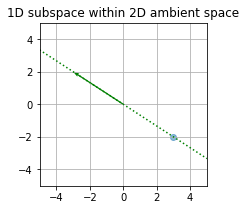

In [12]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
 
# Lock in parameters for simpler function calls later on
plot_quiver = partial(plt.quiver, angles='xy', scale_units='xy',
 scale=1)
 
def plot_example(basis_vector, points, title=""):
    """ Plot figure defining basis vector, the linear subspace
        it defines, as well as another point on the same figure
         
    Args:
        basis_vector (list): x1,y1,x2,y2 of basis vector 
        points:      (list): list of (x,y) of points
    """
 
    plt.figure(figsize=(3,3))
    x1, y1, x2, y2 = basis_vector
    plot_quiver(x1,y1,x2,y2, color='green')
 
    xs = np.linspace(-5,5,1000)
    slope = (y2-y1)/(x2-x1)
    plt.plot(xs, slope*xs, linestyle=':', color='green')
     
    for point in points:
        plt.scatter(point[0],point[1], alpha=0.5)
 
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.grid()
    plt.title(title)
    
plot_example([0,0,-3,2], [[3,-2]],
             title="1D subspace within 2D ambient space")

Here, our vector **a = [-3, 2]** defines the vector with the arrowhead but it also defines the line extending infinitely in front of and behind the same vector (the green dashed line). This means that if we want to project a point onto the line defined by **a**, then we can do it. For example, the point **[3,-2]** is shown in Figure 1. This point has been projected onto the line defined by a. No matter the length of a, it defines a subspace that extends along its direction. Projecting a point onto a subspace defined by a vector doesn’t mean it has to hit where the vector arrow exists, but rather anywhere on the line that goes infinitely ahead or behind the arrow. I hope that point is now clear *[sorry]*.


Now, let’s consider a different 1D linear subspace sitting within an 2D ambient space, with a point that is not on the linear subspace, but which we’d like to project onto it.

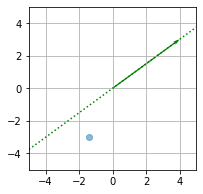

In [13]:
basis_vector = [0,0,4,3]
plot_example(basis_vector, [[-1.4,-3]])

The **shortest distance** between any two points is a **straight line**. With this knowledge, it’s easy to visualise the straight line from the linear subspace to the blue point in 2D space. This imaginary line would be orthogonal (= perpendicular) to the green line (our subspace spanned by the basis vector). It’s this key insight that allows us to find the solution algebraically. We just need one more fact: the dot product of vectors (or points, which implicitly define vectors) in *linear algebra is always zero*.

To be clear, what we are looking for first is the location on the linear subspace that defines where a straight-line projection from our point of interest would hit, if this line was always perpendicular (orthogonal) to the linear subspace. We will take this value and we will multiply the basis vector (which defines the linear subspace) to arrive that the location that is the closest point on the line to our given point of interest, **[-1.4, -3]**. We will call the location on the line, closest to our point of interest, **β**. Therefore, **βa** (**β** multiplied by **a**) is the closest point on the line spanned by a, to our point of interest. Once we set up the equation, it’s only a case of distributing the terms, manipulating the equality and then isolating **β**.

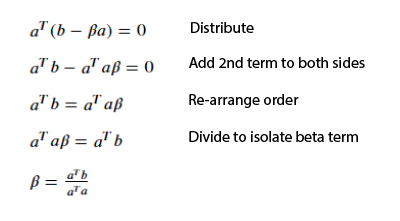

In [14]:
display.Image("Projections/derivation.png")

We can now write a function to calculate where **β** is on our linear subspace.



In [16]:
def proj(a, b):
    np_a = np.array(a, ndmin=2)
    np_b = np.array(b, ndmin=2)
    result = (np_a@np_b.T) / np.linalg.norm(np_a)
    return result[0]
 
scaling_factor = proj(basis_vector[2:], [2.4,-3])
print(scaling_factor)

[0.12]


This means if we take the basis vector **[4, 3]**, normalise it (by dividing by its norm) and scale it by **0.12**, then we will have the point on our linear subspace where our point of interest **[-1.4, -3]** is closest. This point is plotted in Figure 3 below (in orange).

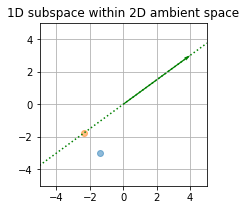

In [18]:
basis_vector = np.array([0, 0, 4, 3])
point_of_interest = np.array([-1.4, -3])
 
scaling_factor = proj(basis_vector[2:], point_of_interest)
basis_vector_norm = np.linalg.norm(basis_vector[2:])
projected_point = scaling_factor * (basis_vector[2:] / basis_vector_norm)
closest_point_on_line = list(projected_point)
                              
points = [point_of_interest, closest_point_on_line]
 
plot_example(basis_vector, points,
             title="1D subspace within 2D ambient space")

### The Formula

There is a little bit of potential confusion in terms of the projection formula. The important part is that it consists of (1) defining the scalar projection to get the **length** of the desired projection and then multiplying this by the basis vector, which has been normalised (scaled by its own Euclidean norm) in order to get the **direction** of the desired projection. This is shown in the equations given below.

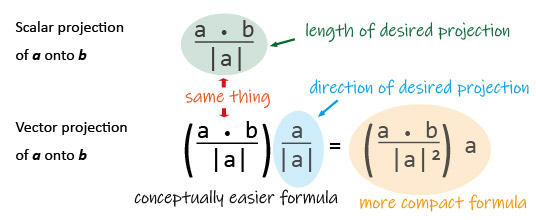

In [19]:
display.Image("Projections/fig5.jpg")

The formula with the squared norm in the bottom is a way to make the formula more compact. It's more intuitive to to think conceptually about the projection formula from the longer, less-compact form, which consists of scalar projection to determine the length and then multiplying the unit-normalised basis vector by that amount. We always want the direction to be the unit vector (i.e. have a length of one) so that the length of the vector is exactly that which we calculate via the scalar projection.

In the function code above to calculate the projection, the denominator contains the norm of, namely **|a|** and the normalisation of the direction vector was explicitly applied when calculating the projection `projected_point`. Code that performs the full vector projection can take advantage of requiring the squared norm in the denominator (thereby avoiding the square root calculation otherwise required). It's more efficient this way, but I find blurs some of the conceptual wisdom underlying the mechanics of the equation, which I have tried to stress here.

the shortest distance must be the straight line from the subspace to the point of interest, which defines a perpendicular line away from the subspace. The subtraction of this line defines the point on the line which the original basis vector needs to be scaled by and this is the linear projection onto the subspace. The next step is to consider projecting vectors onto other vectors, which involves only a few extra considerations. 

## General Projections: Points onto Planes

The previous section considered a basic case of taking a 2D point and projecting it onto a 1D linear subspace. This example had a number of advantages in terms of simplicity. For example, because we were talking about linear subspaces spanned by vectors, the dot product of a vector with itself is a scalar and we can easily divide vectors by scalars in linear algebra. Division as a concept does not exist for matrices, so when we come to projecting points onto planes, this requires projecting onto matrices which contain the basis vectors for each dimension. When dealing with matrix division, we multiple with inverse matrices instead. First, however, it’s good to get a visual understanding of the situation we’re dealing with.

In the figure below, we’re given a 3D space and two basis vectors that define a *plane* instead of a *line*. The top-left image shows the basis vectors that define this plane. The top-right image shows a 2D snapshot of these basis vectors. The bottom-left contains an animation showing the 2D plane defined within 3D space spanned by these two vectors. In the bottom-right plot, a single snapshot of this is provided, with a point not on the plane. Our goal will be to work through the way to project this point onto the closest point on the plane.

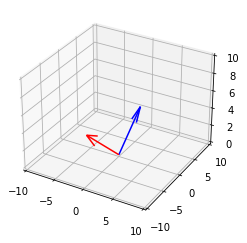

In [31]:
# to reproduce "a"

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,10)

p1 = [1, -2, 5]
p2 = [8, 3, 2]

ax.quiver(0,0,0,2,3,5, color='blue')
ax.quiver(0,0,0,-2,-6,4, color='red')

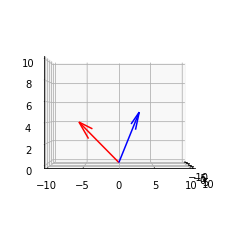

In [32]:
# to reproduce "b"

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,10)

ax.quiver(0,0,0,2,3,5, color='blue')
ax.quiver(0,0,0,-2,-6,4, color='red')

ax.view_init(0,0)

In [ ]:
# to reproduce "c"

from matplotlib import animation

%matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,10)

ax.quiver(0,0,0,*p1, color='blue')
ax.quiver(0,0,0,*p2, color='red')

x = np.linspace(-15, 10, 50)
y = np.linspace(-15, 10, 50)

X, Y = np.meshgrid(x, y)

Z = X - 2*Y

ax.plot_surface(X, Y, Z, alpha=0.5)

def rotate(angle):
     ax.view_init(azim=angle)

angle = 1
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 90, angle), interval=50)
#ani.save('rotating_plane.gif', writer=animation.PillowWriter(fps=30))

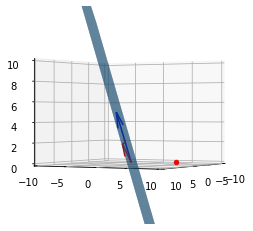

In [33]:
# to reproduce "d"

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,10)

ax.quiver(0,0,0,*p1, color='blue')
ax.quiver(0,0,0,*p2, color='red')

x = np.linspace(-15, 10, 50)
y = np.linspace(-15, 10, 50)

X, Y = np.meshgrid(x, y)

Z = X - 2*Y

ax.plot_surface(X, Y, Z)


ax.scatter(-5,5,0, color='red')
ax.view_init(0, 29)

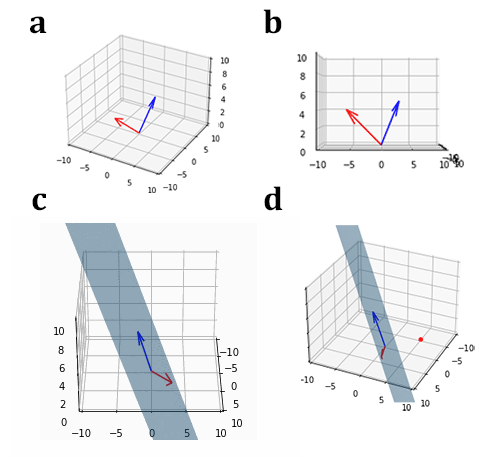

In [20]:
display.Image("Projections/fig6.gif")

Let’s take a look at the formulas to derive the projection in our general case, which is a generalisation of the 2D case, but applies for all other cases (there is no limit to the number of basis vectors you can have, the formula for the > 2D case is the same)

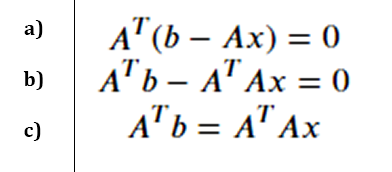

In [46]:
display.Image("Projections/fig7-2.png")

Let’s first compare Figure 7 with the same set of equations (almost) which we gave for the 2D point being projected onto a line above (Figure 3). We first start off with the matrix version, whereas in Figure 3 the lowercase a represented a line (a single basis vector), whereas now we’re in multidimensional space and the basis vectors are stacked column-wise into a matrix. So far, the situation is easily comparable with the simpler case. We follow the exact same steps regarding distributing (in step b) and re-arranging terms (step c). We want to figure out what the x vector should be.

The problem we run into now is that we need to isolate the vector of terms x, (which multiplies each of the basis vectors in matrix A). In the earlier case, we only had one basis vector and x was a scalar we called β (the point b we already knew in advance, because we wanted to project it onto the line). If we have 2 basis vectors defining a plane, then our vector of coefficients x needs to have two values – one to show the scaling factor of each basis vector to arrive at the closest point (straight-line distance) to our point of interest, off the plane but in the larger ambient space (the red dot in Fig 6(d)).

**Important**: Vectors can be divided by scalars (each value in the vector is divided by the same scalar value). This is, however, not true for matrices. Division is not a defined operation on matrices. However, division has a multiplicative counterpart in all of mathematics. If you multiply by the reciprocal of a number, this has the effect of dividing by that number. This is easily seen in Figure 8 below.

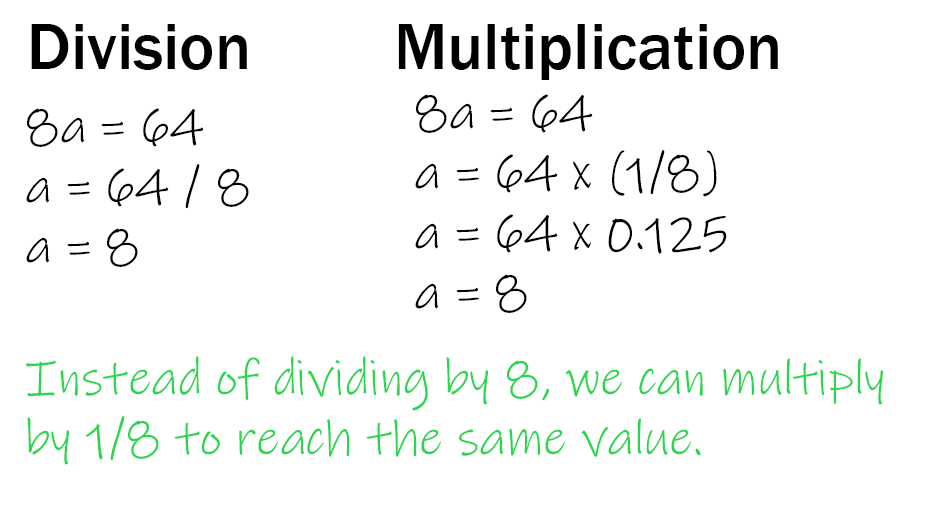

In [22]:
display.Image("Projections/fig8.png")

The matrix version of *multiplying by the reciprocal* is by *multiplying by an* **inverse matrix**. The inverse operation on scalars results in the reciprocal, but for matrices gives us inverse matrices, which we can use to undo certain operations. This is very handy when we want to isolate a value on one side of an equality, such as in the above. In Figure 3 for the simpler case, we divided by the dot product of $a$ with itself (which is a scalar). A vector multiplied by itself results in a single value, but this doesn’t hold for matrices. We need to multiply by the inverse matrix of the terms we want to disappear, since a term multiplied by its inverse results in the identity matrix, which we can omit from the equation. Figure 9 illustrates this process.

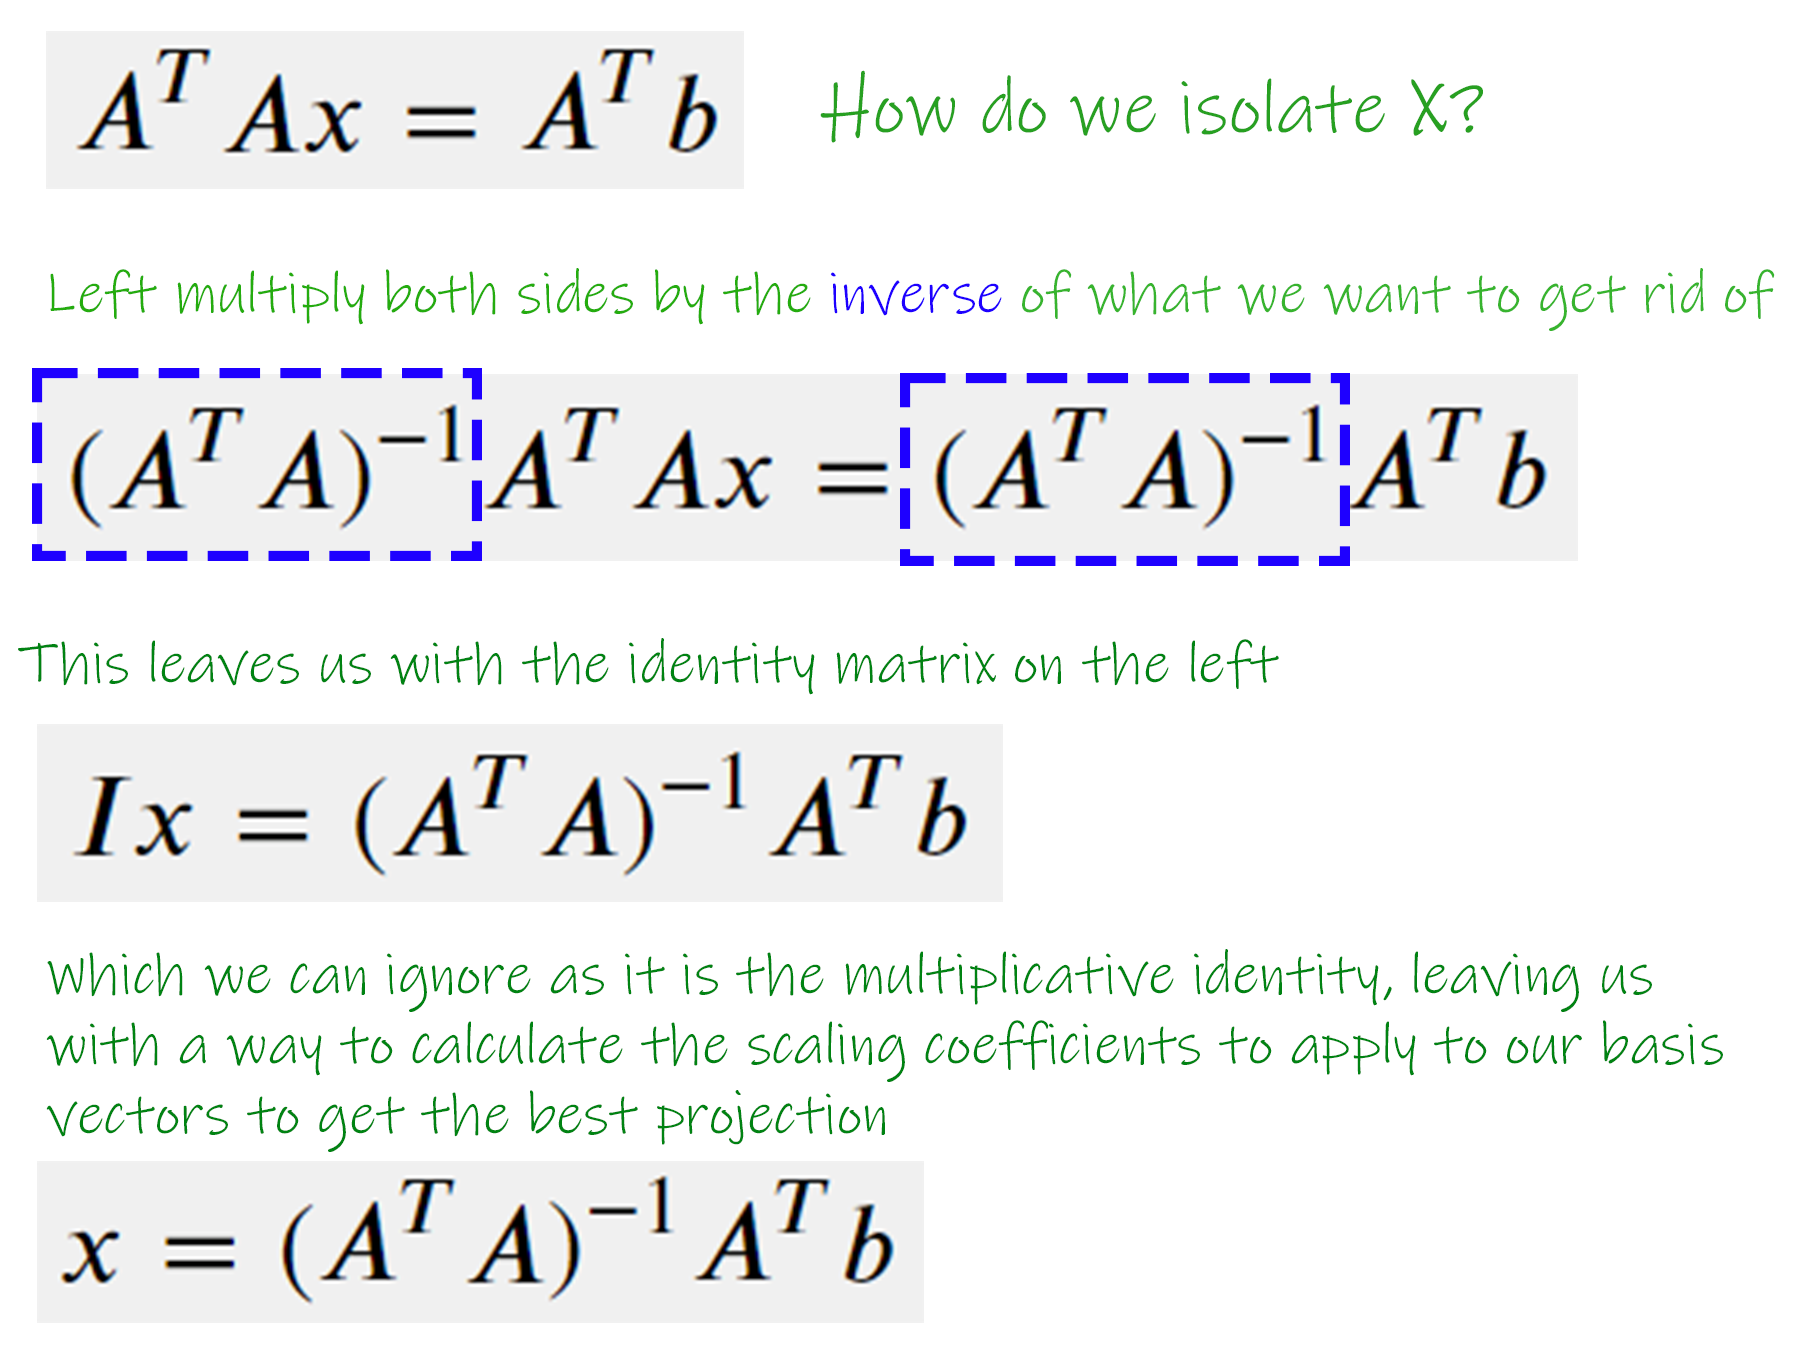

In [23]:
display.Image("Projections/fig9.png")

Those of you who have studied Linear Regression will instantly recognise the bottom equation as that of the so-called *“normal equation“*. That is in fact nothing more than projecting your data points onto the line that minimises the distance to the data points, namely a straight line. If you are using the same amount of basis vectors in your ambient space, and they’re linearly independent, every point within the ambient space is reachable from a linear combination of the basis vectors and you know that the point of interest $b$ is in the span of the column space of matrix $A$. This formula is also the same as the (left) *Moore-Penrose pseudo-inverse* for overdetermined systems of linear equations.

To wrap up, I will implement the previous section in code and plot it. This will involve defining the two basis vectors, the point of interest and demonstrating how the code recovers the correct projection onto the plane spanned by the basis vectors.

In [39]:
# define basis vectors
basis_vec1 = np.array([8, 3, 2]).reshape(1, -1)
basis_vec2 = np.array([1, -2, 5]).reshape(1, -1)
 
# concatenate them in matrix A
A = np.concatenate([basis_vec1, basis_vec2], axis=0)
 
# this is the point we want to project onto the plane
point = np.array([-5, 5, 0])
 
def calculate_projection(A, point):
    A_transpose_A = A@A.T
    A_transpose_A_inv = np.linalg.inv(A_transpose_A)
    A_transpose_b = A@point
    result = A_transpose_A_inv @ A_transpose_b
    return result
 
x, y = calculate_projection(A, point)
# Z = X - 2*Y is our plane equation
z = x - 2*y
 
new_point = (x, y, z)

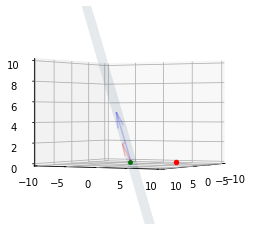

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,10)

ax.quiver(0,0,0,*p1, color='blue', alpha=0.2)
ax.quiver(0,0,0,*p2, color='red', alpha=0.2)

x = np.linspace(-15, 10, 50)
y = np.linspace(-15, 10, 50)

X, Y = np.meshgrid(x, y)

Z = X - 2*Y

ax.plot_surface(X, Y, Z, alpha=0.1)
 
# to plot this point use code below
plt.scatter(new_point[0], new_point[1], s=15, color='g')

ax.scatter(-5,5,0, color='red')

ax.view_init(0, 29)

There is much more to say about the technicalities and advanced applications of projections in Linear Algebra, but those will be for for later posts. This post is aimed at the curious reader who has an idea about projections but perhaps needs to see a detailed walkthrough. Please leave comments below if you feel this post could be improved in any way.

### Misc. 

Unless explicitly specified, all images were generated by the author.

## Further Reading

If you’re interested in learning more about projections or linear algebra in general, I recommend Gilbert Strang’s books and video courses (MIT 18.06). If you would like a gentler introduction, then I can also highly recommend Mike Cohen’s books. and other useful educational information.